In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, FancyBboxPatch
from matplotlib.lines import Line2D
import seaborn as sns

# Import sentences data

In [2]:
previous, current = os.path.split(os.getcwd())
dname = previous[0:-5]

# import sentences features values distributions
sub = pd.read_csv(dname + "\\data\\GLMM\\all_subjects_sentences_peak_env.csv")
subsub = sub.loc[(sub['suj_id'] == 'suj_1') & (sub['vitesse'] == 2.0)]
subsub = subsub[['nb_phon/s', 'nb_syll/s', 'phon_fl/s',
                 'syll_fl/s', 'log_freqlex/s', 'camemBERT/s', 'peak_env']]
subsub.columns = ['nb_phon/s', 'nb_syll/s', 'phon_fl/s',
                  'syll_fl/s', 'log_freqlex/s', 'ctx_surp', 'peak_env']

# import sentences isolation point distributions
sent_ip = pd.read_csv(
    dname + "/data/LMM/all_subjects_sentences_ip_75_pk_env.csv")  # sentences_ip.csv
sent_ip = sent_ip[['peak_env', 'phon_rate', 'syll_rate', 'phir_rate',
                   'syir_rate', 'stat_surp', 'ctxt_surp', 'isolation_point']]
sent_ip.columns = ['peak_env', 'nb_phon/s', 'nb_syll/s', 'phon_fl/s',
                   'syll_fl/s', 'log_freqlex/s', 'ctx_surp', 'isolation_point']

for i in sent_ip.columns[0:-1]:
    sent_ip[i] = sent_ip[i].values * sent_ip['isolation_point'].values

# Import sentences overlap data

In [3]:
sentences = pd.read_csv(dname + "\\data\\LMM\\overlap_sentences_pk_env.csv")

sentences.columns = ['subject', 'nb_syll.s', 'nb_phon.s',
                     'syll_fl.s', 'phon_fl.s', 'log_freqlex.s', 'ctx_surp', 'peak_env']

sentences2 = sentences[["peak_env", "nb_phon.s", "nb_syll.s",
                        "phon_fl.s", "syll_fl.s", "log_freqlex.s", "ctx_surp"]]

sentences2['data'] = np.repeat('sentences', 21)

# Plot figure 6

In [4]:
variables = ['peak_env', 'nb_phon/s', 'phon_fl/s',
             'log_freqlex/s', 'nb_syll/s', 'syll_fl/s', 'ctx_surp']

colors = ['k', '#e41a1c', '#efca08',  '#377eb8',
          '#ff7f00', '#4daf4a', 'darkorchid']

ticks = [
    np.linspace(0, 35, num=5, dtype=np.int32),
    np.linspace(0, 80, num=5, dtype=np.int32),
    np.linspace(0, 12, num=5, dtype=np.int32),
    np.linspace(0, 60, num=5, dtype=np.int32),
    np.linspace(0, 35, num=5, dtype=np.int32),
    np.linspace(0, 25, num=5, dtype=np.int32),
    np.linspace(0, 25, num=5, dtype=np.int32) ]

xlabels = [
    'Rate ($s^{-1}$)',
    'Rate ($s^{-1}$)',
    'Surprise rate ($bit.s^{-1}$)',
    'Surprise rate ($bit.s^{-1}$)',
    'Rate ($s^{-1}$)',
    'Surprise rate ($bit.s^{-1}$)',
    'Surprise rate ($bit.s^{-1}$)']

lims = [[0, 35], [0, 61], [0, 12], [0, 35], [0, 27], [0, 20], [-0.5, 20]]

titles = [r'Acoustic modulation rate',
          r'Phonemic rate',
          r'Phonemic information',
          r'Static lexical surprise',
          r'Syllabic rate',
          r'Syllabic information',
          r'Contextual lexical surprise']

dfs = [subsub, sent_ip]

legend_elements = [
    Patch(facecolor='k', alpha=0.35, edgecolor='k', label='non-compressed'),
    Patch(facecolor='grey', edgecolor='darkgrey',alpha=0.5, label='compressed (x2 -> x5)'),
    Patch(facecolor='k', edgecolor='k', label='channel capacity') ]

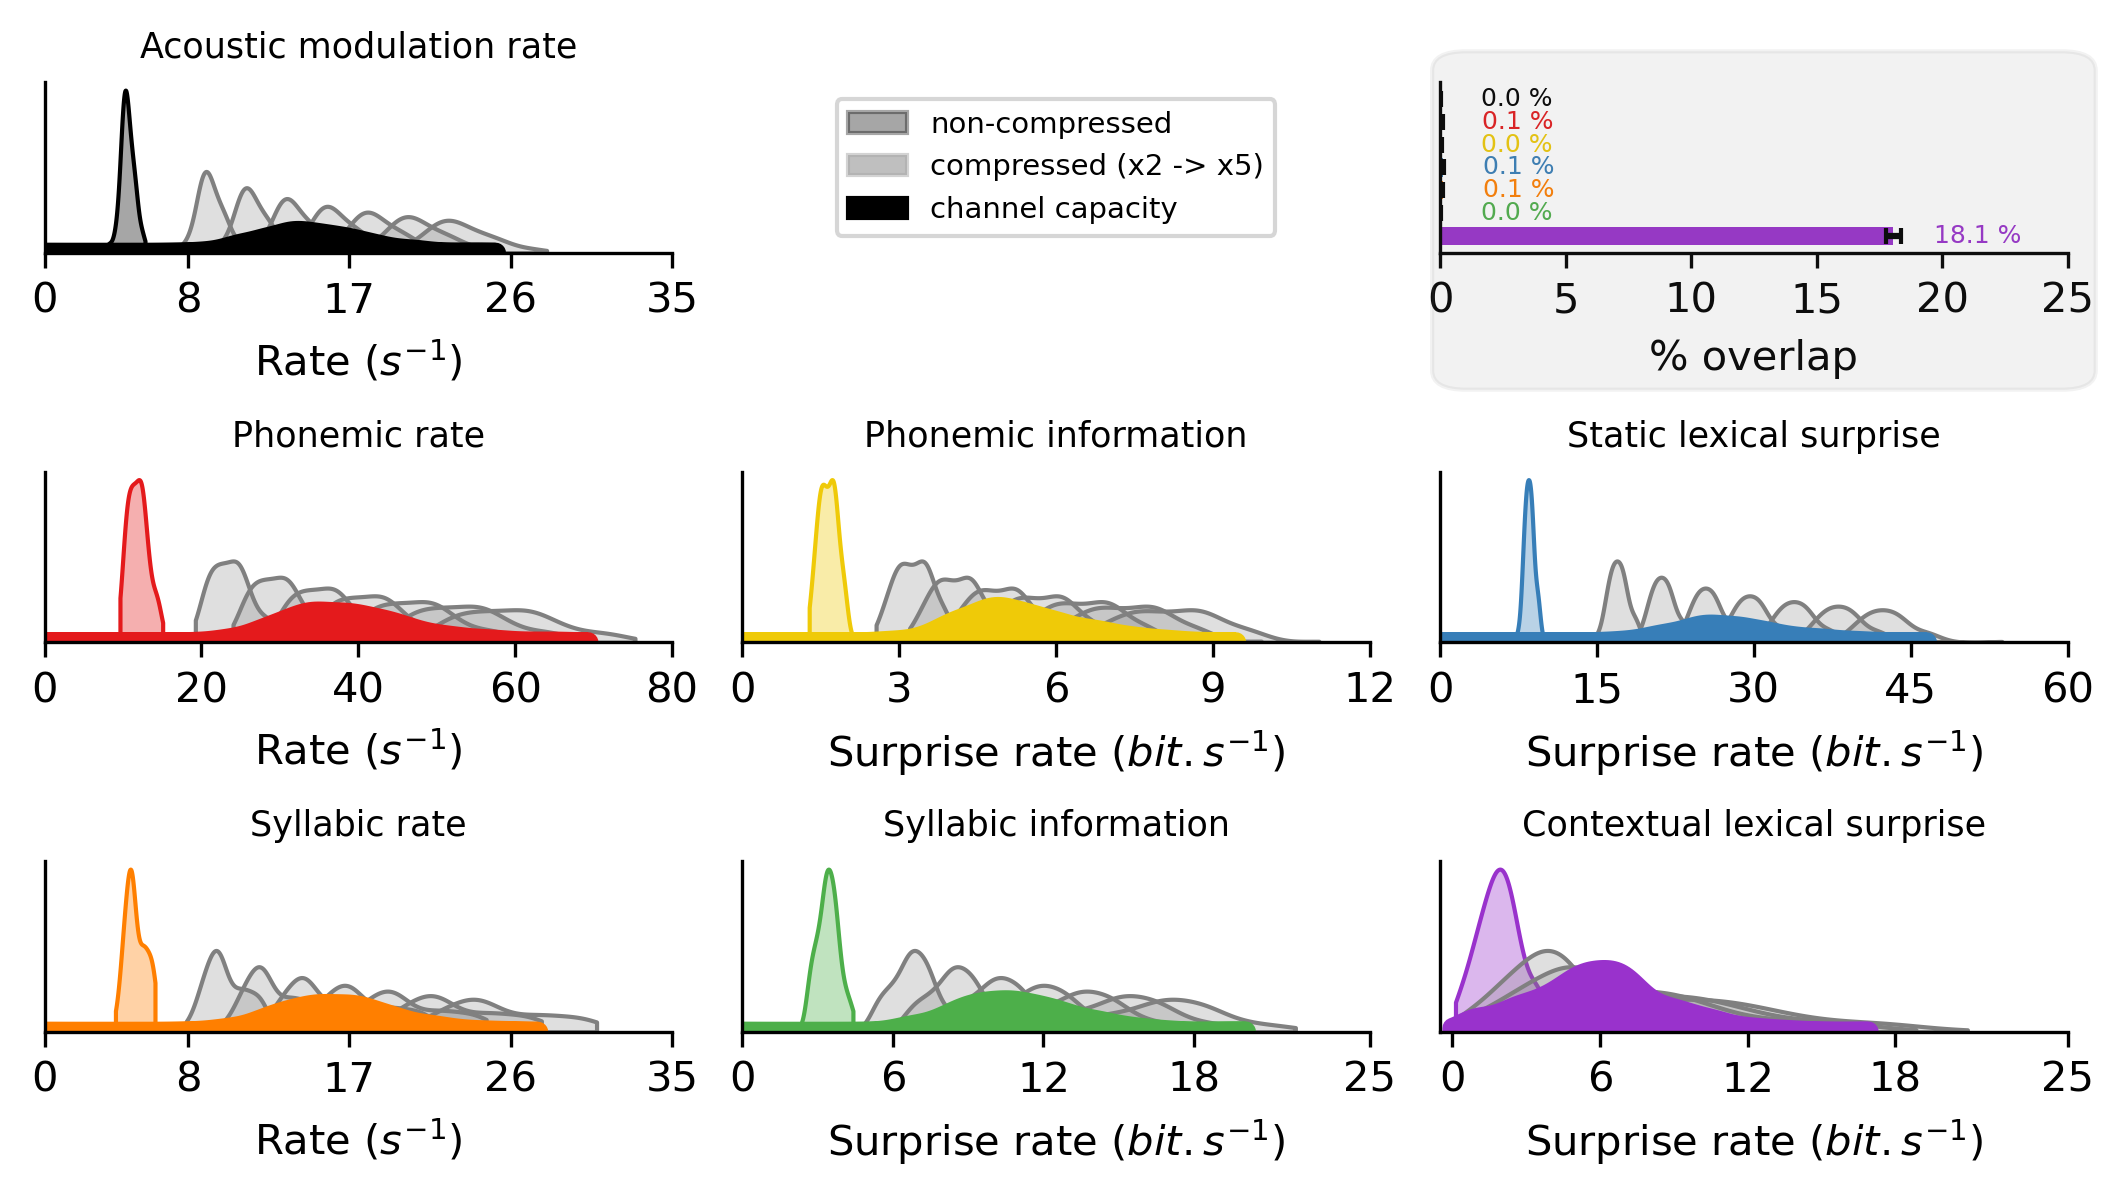

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(7.09, 4), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "7"

axis1 = axs.ravel()[2]
x_pos = np.arange(len(variables))[::-1]
CTEs = [np.mean(sentences2[i].values) for i in sentences2.columns[0:-1]]
error = [np.std(sentences2[i].values)
         for i in sentences2.columns[0:-1]] / np.sqrt(np.size(sentences2, 0))

axis1.barh(x_pos, CTEs,
           xerr=error,
           align='center',
           ecolor='black',
           color=colors,
           capsize=2)
axis1.spines['right'].set_visible(False)
axis1.set_xlim(0, 25)
axis1.spines['top'].set_visible(False)
axis1.set_yticks([])
axis1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axis1.set_xlabel("% overlap")
for i, v in enumerate(CTEs[::-1]):
    axis1.text(v+1.6, i, str(round(v, 1))+" %",
               color=colors[::-1][i], va="center", fontsize=6)

for i, (variable, ax, col, lim, tit, tik, xlab) in enumerate(zip(variables, axs.ravel()[list(np.r_[0, 3:9])], colors, lims, titles, ticks, xlabels)):
    a = 0
    for df in dfs:
        a += 1
        if a == 1:
            sns.kdeplot(df[variable].values/2., fill=True, ax=ax, color=col,
                        alpha=0.35, cut=0, log_scale=False, label='non-compressed')
            for j in [2, 2.5, 3., 3.5, 4., 4.5, 5.]:
                sns.kdeplot((df[variable].values/2.)*j, fill=True, ax=ax,
                            color='grey', cut=0)
        else:
            sns.kdeplot(df[variable].values, fill=True, ax=ax,
                        color=col, cut=0, alpha=1, log_scale=False, linewidth=5, label='isolation point')

    ax.spines['right'].set_visible(False)
    ax.set_xlim(lim)
    ax.spines['top'].set_visible(False)
    ax.set_yticks([])
    ax.set_title(tit)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xlabel(xlab)
    ax.set_xticks(tik)
    ax.set_ylabel('')

# legend only
ax2 = axs.ravel()[1]
ax2.legend(handles=legend_elements, loc='center')
axs.ravel()[1].set_axis_off()

# add grey fancy box
fig.patches.extend([FancyBboxPatch((0.69, 0.69), 0.28, 0.25,
                                   fill=True, color='grey', alpha=.1,
                                   boxstyle="round,pad=0.08", transform=fig.transFigure, mutation_scale=.20, mutation_aspect=None)])

plt.tight_layout(w_pad=1)

In [14]:
#fig.savefig(dname + '\\Figures\\Figure_6.png', dpi=300,bbox_inches='tight')